# **Dynamic Object Detection and Segmentation with YOLOv9+SAM**

This Jupyter Notebook showcases the combined power of YOLOv9 and the Spatial Attention Module (SAM) for advanced object detection and segmentation. Aimed at pushing the boundaries of computer vision, this implementation focuses on precise identification and detailed segmentation of objects within images. It encapsulates the end-to-end process, including setting up the models, preprocessing inputs, executing detection, applying segmentation masks, and visualizing the results. This streamlined narrative serves as both a technical guide and a window into the model's capabilities for real-world applications.

## **GPU Status Check**

We begin by checking the availability and status of our GPU, which is crucial for the computationally intensive tasks of video processing and running the YOLOv9 model. The nvidia-smi command gives us a snapshot of the GPU's model, memory usage, and active processes, ensuring our setup is ready for the subsequent operations.

In [ ]:
!nvidia-smi

Thu Mar 14 18:17:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

## **Mounting Google Drive**

Mount the Google Drive to load the dataset and any other resources stored in the drive. Navigate to the folder where dataset is stored.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Setting Up YOLOv9**

This cell clones the YOLOv9 repository, switches to the YOLOv9 directory, and installs required dependencies. It prepares the environment for running YOLOv9-based object detection and segmentation tasks.

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip3 install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 325 (delta 134), reused 102 (delta 102), pack-reused 153
Receiving objects: 100% (325/325), 2.26 MiB | 6.82 MiB/s, done.
Resolving deltas: 100% (159/159), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:

## **Displaying Current Directory**

This cell imports the os module to access system functionality, then uses os.getcwd() to get the current working directory's path. The path is stored in the HOME variable and printed out, showing the directory from which the notebook is running.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/yolov9


## **Downloading Model Weights**

This cell creates a directory for model weights within the current working directory, then downloads specific YOLOv9 and Gelan model weights from their respective release pages on GitHub. These weights are essential for initializing the models with pre-trained parameters, enabling effective object detection and segmentation without starting from scratch.

In [ ]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

## **Preparing Data Directory and Downloading an Image for Inference**

This cell creates a data directory in the current working environment and downloads a sample image, dog.jpeg, into it. It then sets the path to this downloaded image in the SOURCE_IMAGE_PATH variable, making it ready for processing with the initialized models.

In [ ]:
!mkdir -p {HOME}/data
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg
SOURCE_IMAGE_PATH = f"{HOME}/dog.jpeg"

## **Running Detection with Custom Weights**

This command executes the detect.py script with specific parameters to perform object detection on an image. It uses the gelan-c.pt model weights stored in the weights directory and sets a confidence threshold of 0.1. The detection is run on a single image located in a specified path on Google Drive. The process is carried out on the CPU, and the script is configured to save detection results in a text file and include the confidence scores for each detected object.

In [ ]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source /content/drive/MyDrive/data/image9.jpeg --device 0 --save-txt --save-conf

detect: weights=['/content/yolov9/weights/gelan-c.pt'], source=/content/drive/MyDrive/data/image9.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/drive/MyDrive/data/image9.jpeg: 480x640 3 persons, 1 bottle, 1331.5ms
Speed: 12.0ms pre-process, 1331.5ms inference, 51.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/labels


## **Displaying Detection Results**

This Python code uses IPython's display and Image functions to display the image with detected objects from the specified path. It adjusts the image's width to 600 pixels for better viewing within the notebook, providing a visual confirmation of the detection performed by the YOLOv9 model.

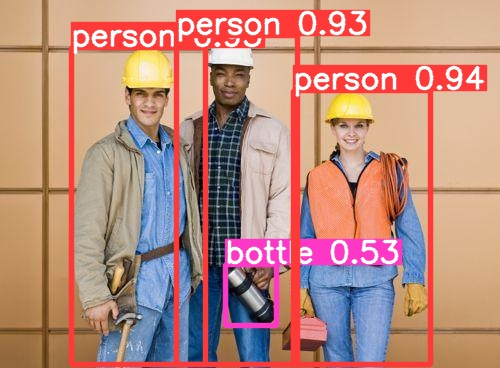

In [ ]:
from IPython.display import Image, display
Image(filename=f"/content/yolov9/runs/detect/exp/image9.jpeg", width=600)

## **Installing Ultralytics and Importing YOLO**

This cell first installs the Ultralytics package using pip, which provides access to the YOLO (You Only Look Once) object detection model implementations and utilities developed by Ultralytics. Following the installation, it imports the YOLO class from the ultralytics package, making it available for object detection tasks such as loading a model, processing images, and performing detections within your Python environment.

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 7.0 MB/s eta 0:00:00


## **Installing Segment-Anything and Downloading Weights**

This cell installs the Segment-Anything library from its GitHub repository, providing tools for segmenting objects in images with state-of-the-art models. It then downloads the sam_vit_h_4b8939.pth file, which contains pre-trained weights for the Spatial Attention Module (SAM) designed to work with Vision Transformer (ViT) architectures. These actions prepare the environment for high-quality image segmentation tasks.

In [ ]:
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-k8kmj1re
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-k8kmj1re
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36590 sha256=52cf96568dc1479ffabe6f3200c363e8b896d812102b6270dfe79d3993538157
  Stored in directory: /tmp/pip-ephem-wheel-cache-z3j8ujaf/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
--2024-03-14 16:27:37--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.7.38, 13.35.7.82, 13.35.7.128, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.7.38|:44

## **Extracting Detection Results and Confidence Scores**

This code reads detection results from a specified text file, containing object detection outcomes generated by the YOLOv9 model. It processes each line to extract the class ID, confidence score, and bounding box coordinates (normalized to the scale of the image). The coordinates are then converted from the center format to the standard xmin, ymin, xmax, ymax format. Finally, it prints out the class ID, confidence score, and bounding box coordinates for each detected object, providing a clear overview of the detection results and their accuracy.

In [ ]:
import cv2

# Specify the path to your image
image_path = '/content/drive/MyDrive/data/image9.jpeg'

# Read the image to get its dimensions
image = cv2.imread(image_path)
image_height, image_width, _ = image.shape

detections_path = '/content/yolov9/runs/detect/exp/labels/image9.txt'

bboxes = []
class_ids = []
conf_scores = []

with open(detections_path, 'r') as file:
    for line in file:
        components = line.split()
        class_id = int(components[0])
        confidence = float(components[5])
        cx, cy, w, h = [float(x) for x in components[1:5]]

        # Convert from normalized [0, 1] to image scale
        cx *= image_width
        cy *= image_height
        w *= image_width
        h *= image_height

        # Convert the center x, y, width, and height to xmin, ymin, xmax, ymax
        xmin = cx - w / 2
        ymin = cy - h / 2
        xmax = cx + w / 2
        ymax = cy + h / 2

        class_ids.append(class_id)
        bboxes.append((xmin, ymin, xmax, ymax))
        conf_scores.append(confidence)

# Display the results
for class_id, bbox, conf in zip(class_ids, bboxes, conf_scores):
    print(f'Class ID: {class_id}, Confidence: {conf:.2f}, BBox coordinates: {bbox}')


Class ID: 39, Confidence: 0.53, BBox coordinates: (225.0, 264.000072, 276.0, 325.00012)
Class ID: 0, Confidence: 0.93, BBox coordinates: (71.0, 47.00004000000001, 205.0, 364.000024)
Class ID: 0, Confidence: 0.93, BBox coordinates: (176.0, 35.00011200000003, 297.0, 364.00020800000004)
Class ID: 0, Confidence: 0.94, BBox coordinates: (293.0, 90.00010399999996, 430.0, 364.000024)


## **Initializing SAM for Image Segmentation**

This code initializes the Spatial Attention Module (SAM) for image segmentation using the Segment-Anything library. It specifies the path to the pre-trained weights (sam_vit_h_4b8939.pth) and selects the vit_h model type from the sam_model_registry. Then, it creates an instance of the SAM model loaded with the specified weights. Finally, a SamPredictor is instantiated with the SAM model, making it ready to generate segmentation masks for detected objects in images. This setup is essential for applying fine-grained segmentation to enhance the results of object detection tasks.

In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
sam_checkpoint = "/content/yolov9/sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)

## **Loading Image for Segmentation**

This code loads an image from a specified path using OpenCV, converts it from BGR to RGB format to match the color space expected by most image processing libraries and the Segment-Anything model. After loading and converting the image, it sets the image in the SamPredictor instance. This step prepares the image for segmentation, enabling the SAM model to generate segmentation masks for detected objects within the image.






In [ ]:
import cv2
image = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/data/image9.jpeg'), cv2.COLOR_BGR2RGB)
predictor.set_image(image)

## **Visualize Results**

This code block is designed to visualize the results of object detection and segmentation on an image. Here's a step-by-step breakdown:

**Load Class Names:** It begins by loading class names from a coco.yaml file, which contains the mapping of class IDs to their names for the COCO dataset.

**Color Mapping:** A unique random color is assigned to each class ID present in the detections. This color mapping ensures consistent color representation for each class across the visualization.

**Visualization Functions:** Two helper functions, show_mask and show_box, are defined for displaying segmentation masks and bounding boxes, respectively. show_mask overlays a semi-transparent mask of a specified color onto the image, while show_box draws a bounding box around the detected object and labels it with the class name and confidence score.

**Image Preparation and Display:** The original image is displayed using Matplotlib, setting the stage for overlaying the detections.

**Displaying Detections:** For each detected object, its corresponding mask is generated using the SamPredictor instance, and both the mask and bounding box are visualized using the previously defined helper functions. The class name and confidence score are displayed above the bounding box.

**Final Touches:** The plot is finalized without axis ticks for a cleaner look, showcasing the detected objects with their segmentation masks and annotated information.

This visualization provides a comprehensive view of the model's performance, illustrating not only where it detects objects but also how accurately it can segment them from the rest of the image.







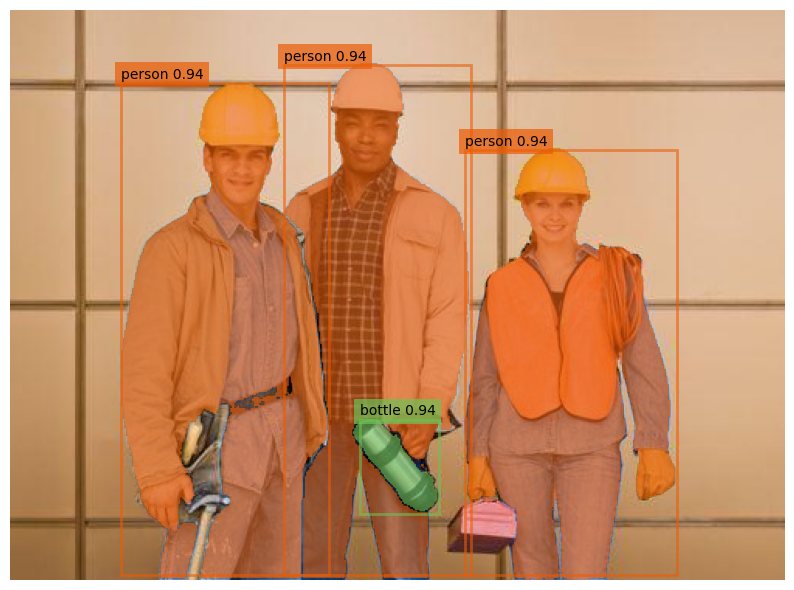

In [ ]:
import matplotlib.patches as patches
from matplotlib import pyplot as plt
import numpy as np
import yaml

with open('/content/yolov9/data/coco.yaml', 'r') as file:
    coco_data = yaml.safe_load(file)
    class_names = coco_data['names']

for class_id, bbox, conf in zip(class_ids, bboxes, conf_scores):
    class_name = class_names[class_id]
    # print(f'Class ID: {class_id}, Class Name: {class_name}, BBox coordinates: {bbox}')

color_map = {}
for class_id in class_ids:
    color_map[class_id] = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)

def show_mask(mask, ax, color):
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * np.array(color).reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_box(box, label, conf_score, color, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    rect = plt.Rectangle((x0, y0), w, h, edgecolor=color, facecolor='none', lw=2)
    ax.add_patch(rect)

    label_offset = 10

    # Construct the label with the class name and confidence score
    label_text = f'{label} {conf_score:.2f}'

    ax.text(x0, y0 - label_offset, label_text, color='black', fontsize=10, va='top', ha='left',
            bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', boxstyle='square,pad=0.4'))

plt.figure(figsize=(10, 10))
ax = plt.gca()
plt.imshow(image)

# Display and process each bounding box with the corresponding mask
for class_id, bbox in zip(class_ids, bboxes):
    class_name = class_names[class_id]
    # print(f'Class ID: {class_id}, Class Name: {class_name}, BBox coordinates: {bbox}')

    color = color_map[class_id]
    input_box = np.array(bbox)

    # Generate the mask for the current bounding box
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box,
        multimask_output=False,
    )

    show_mask(masks[0], ax, color=color)
    show_box(bbox, class_name, conf, color, ax)

# Show the final plot
plt.axis('off')
plt.show()

## **Extract Masks**

This code snippet demonstrates how to generate an aggregate mask from individual object segmentation masks and apply it to create a new image. The new image highlights detected objects with their original colors on a white background. Here's how it works:

**Initialize an Aggregate Mask:** A zero-valued mask the same size as the input image is created. This mask will accumulate segmentation information for all detected objects.

**Aggregate Mask Generation:** For each bounding box from the detections,

- The bounding box is reshaped and passed to the predictor.predict method to generate a segmentation mask for the detected object.
- The aggregate mask is updated to include the new mask by setting the mask area to 1 where the segmentation mask's values exceed a threshold (0.5 in this case).

**Binary Mask Creation:** The aggregate mask is converted into a binary mask, where 1 indicates the presence of any detected object and 0 indicates the background.

**Background Preparation:** A white background image of the same dimensions as the original image is created.

**Applying the Binary Mask:** The binary mask is used to blend the original image and the white background. Detected objects retain their appearance from the original image, while the background is set to white.

**Visualization:** The resulting image is displayed with Matplotlib. This visualization showcases the detected objects prominently against a uniform white background, emphasizing the model's detection and segmentation capabilities.


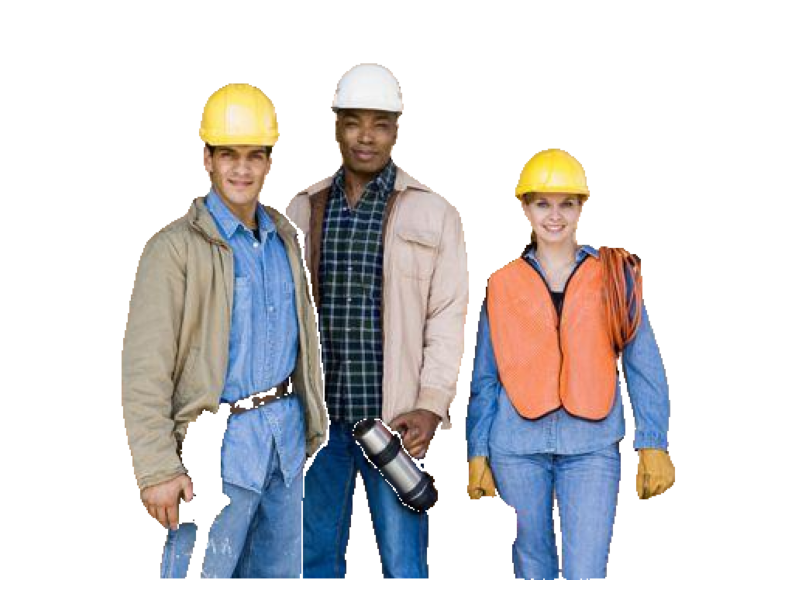

In [ ]:
aggregate_mask = np.zeros(image.shape[:2], dtype=np.uint8)

# Generate and accumulate masks for all bounding boxes
for bbox in bboxes:
    input_box = np.array(bbox).reshape(1, 4)
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box,
        multimask_output=False,
    )
    aggregate_mask = np.where(masks[0] > 0.5, 1, aggregate_mask)

# Convert the aggregate segmentation mask to a binary mask
binary_mask = np.where(aggregate_mask == 1, 1, 0)

# Create a white background with the same size as the image
white_background = np.ones_like(image) * 255

# Apply the binary mask to the original image
# Where the binary mask is 0 (background), use white_background; otherwise, use the original image
new_image = white_background * (1 - binary_mask[..., np.newaxis]) + image * binary_mask[..., np.newaxis]

# Display the new image with the detections and white background
plt.figure(figsize=(10, 10))
plt.imshow(new_image.astype(np.uint8))
plt.axis('off')
plt.show()